In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [4]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.AICE.002101-050112.nc')
plotvar3 = data.variables['aice'][8:5760:12,247:365,700:1300]

In [5]:
aveplot = np.nanmean(plotvar3,axis=1)

In [6]:
A = np.arange(350)
B = np.arange(600)
xx, yy = np.meshgrid(B, A)

In [7]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


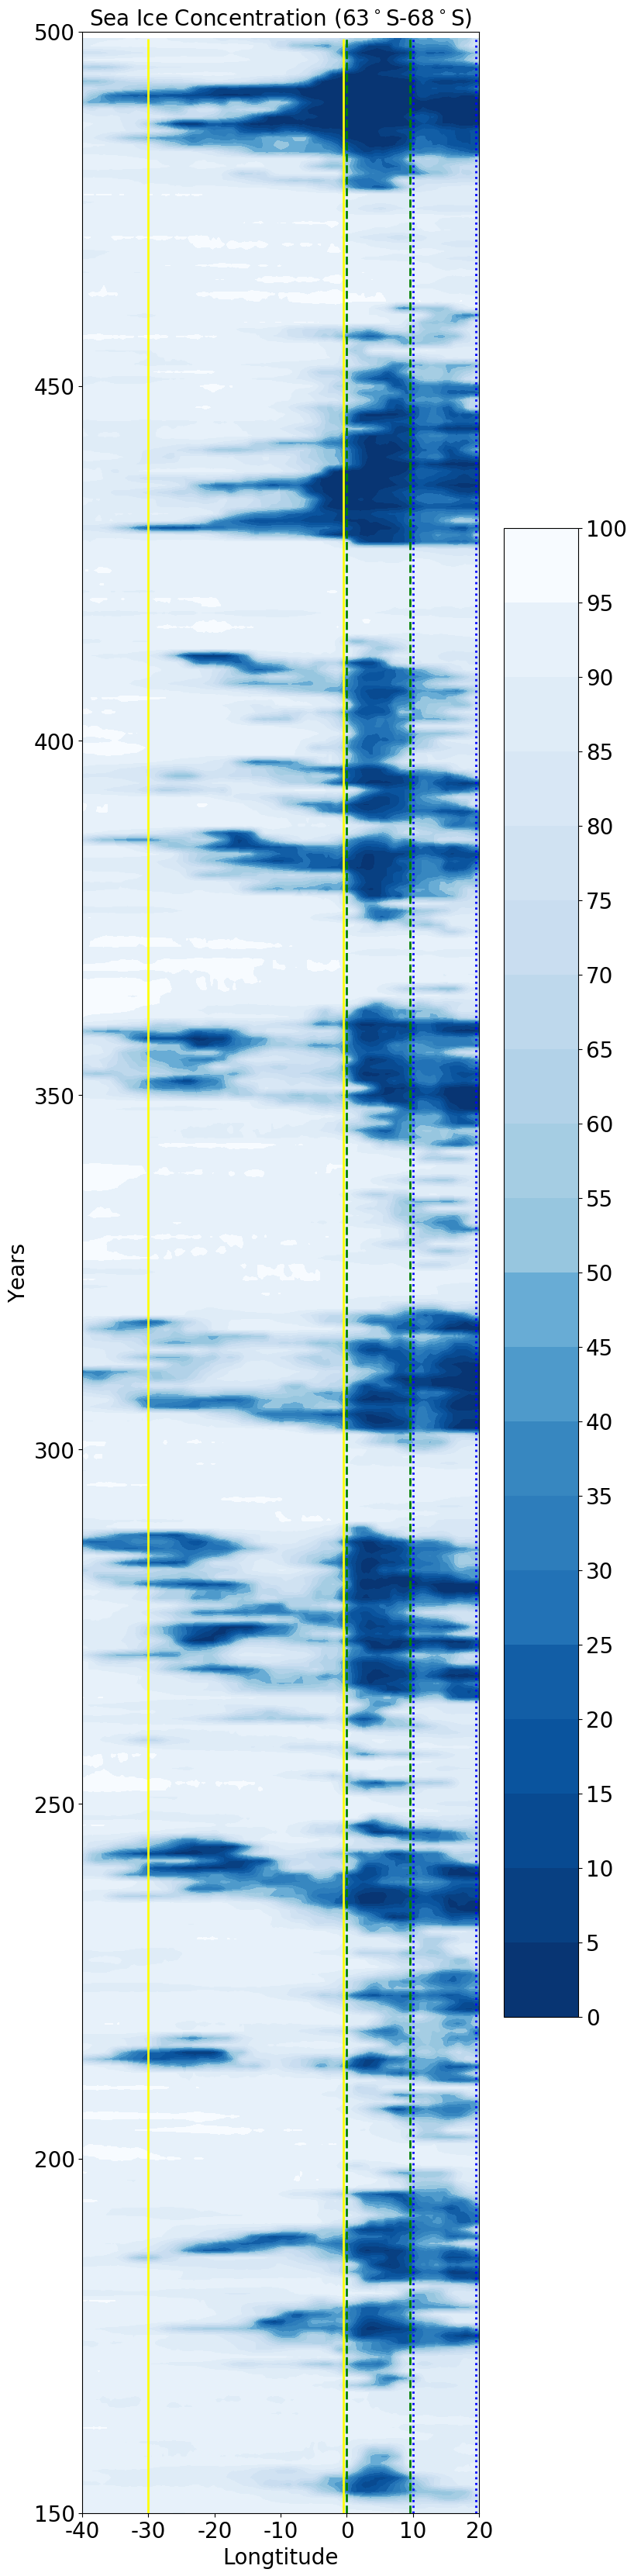

In [8]:
# plot the result
fig = plt.figure(figsize=(8, 40),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, aveplot[129:479,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')

cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)

plt.vlines(100, 0, 349, colors = "yellow",linestyles = "solid",linewidth=2)
plt.vlines(395, 0, 349, colors = "yellow",linestyles = "solid",linewidth=2)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=2)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=2)

plt.vlines(500, 0, 349, colors = "blue",linestyles = "dotted",linewidth=2)
plt.vlines(595, 0, 349, colors = "blue",linestyles = "dotted",linewidth=2)


plt.xticks(range(0,601,100), ['-40','-30','-20','-10', '0', '10', '20'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
                             #'180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Sea Ice Concentration (63$^\circ$S-68$^\circ$S)',**my_font)
plt.savefig("HHH2.png",bbox_inches='tight',dpi=fig.dpi)

In [9]:
np.savetxt('iceplot.out',aveplot[129:479,:])

In [10]:
#weddle2 = aveplot[129:479,100:400]
weddle2new = aveplot[129:479,200:300]
maudrise2 = aveplot[129:479,400:500]
astrid2 = aveplot[129:479,500:600]
#upstream2 = aveplot[129:479,700:800]

In [11]:
weddlemean2new = weddle2new.mean(axis=1)
maudmean2 = maudrise2.mean(axis=1)
astridmean2 = astrid2.mean(axis=1)


In [12]:
np.savetxt('weddlemeanice2new.out', weddlemean2new)
np.savetxt('maudmeanice2.out', maudmean2)
np.savetxt('astridmeanice2.out', astridmean2)


NameError: name 'arpxx2' is not defined

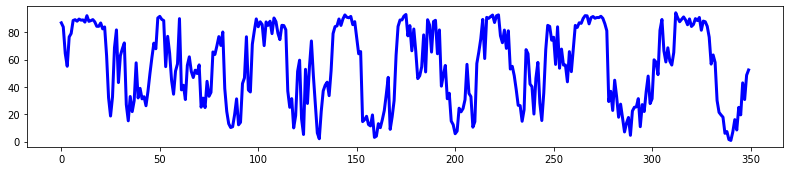

In [13]:
fig = plt.figure(figsize=(15,15))
#######################################
my_font = {'fontname':'Cambria', 'size':'20'}
####################################################
con_ax_top = fig.add_axes([0.15,0.705,0.70,0.13])
plt.plot(astridmean2,'blue',linewidth=3)
plt.vlines(arpxx2, 0, 100, colors = "lightgrey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('ARP',color='blue',**my_font)
plt.title('(a)', fontsize=25)
#############################
fig.add_axes([0.15,0.575,0.70,0.13])
plt.plot(maudmean2,'green',linewidth=3)
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('MRP',color='green',**my_font)
#plt.vlines(noxx, 0, 100, colors = "lightgrey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.vlines(mrpxx2, 0, 100, colors = "lightgrey")
#plt.vlines(wspxx, 0, 100, colors = "r")
#####################################################
fig.add_axes([0.15,0.445,0.70,0.13])
plt.plot(weddlemean2new,'y',linewidth=3)
plt.ylabel('WSP',color='y',**my_font)
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.xticks(range(0,351,50), ['150', '200', '250','300','350','400','450','500'],**my_font)
#plt.vlines(noxx, 0, 100, colors = "lightgrey")
#plt.vlines(mrpxx, 0, 100, colors = "grey")
plt.vlines(wspxx2new, 0, 100, colors = "grey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.xlabel('Years',**my_font)

plt.savefig("icea2.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
wspxx2new = np.where(weddlemean2new<70)
mrpxx2 = np.where(maudmean2<70)
noxx2 = np.where(maudmean2>70)
arpxx2 = np.where(astridmean2<70)

In [ ]:
np.savetxt('wspxx2new.out', wspxx2new)
np.savetxt('mrpxx2.out', mrpxx2)
np.savetxt('noxx2.out', noxx2)

np.savetxt('arpxx2.out', arpxx2)

In [34]:
import waipy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [43]:
weddlemean = np.loadtxt("maudmeanice2.out")
#weddlemean = np.loadtxt("weddlemeanice2new.out")

In [44]:
data_norm = waipy.normalize(weddlemean) # Normalized value, so now there is no unit

In [45]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.88


In [46]:
label='Maud Rise Sea Ice Concentration (Normalized Value)'

In [47]:
result = waipy.cwt(data_norm, 1, pad = 1, dj = 0.25, s0 = 2, j1 = 7/0.25, lag1 = alpha, param = 6, \
                   mother='Morlet',name='x')

Nr of Scales: 29
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966]


In [48]:
time = np.arange(0, 350) * 1 + 150

In [49]:
my_font = {'fontname':'Cambria', 'size':'25','weight' : 'bold'}

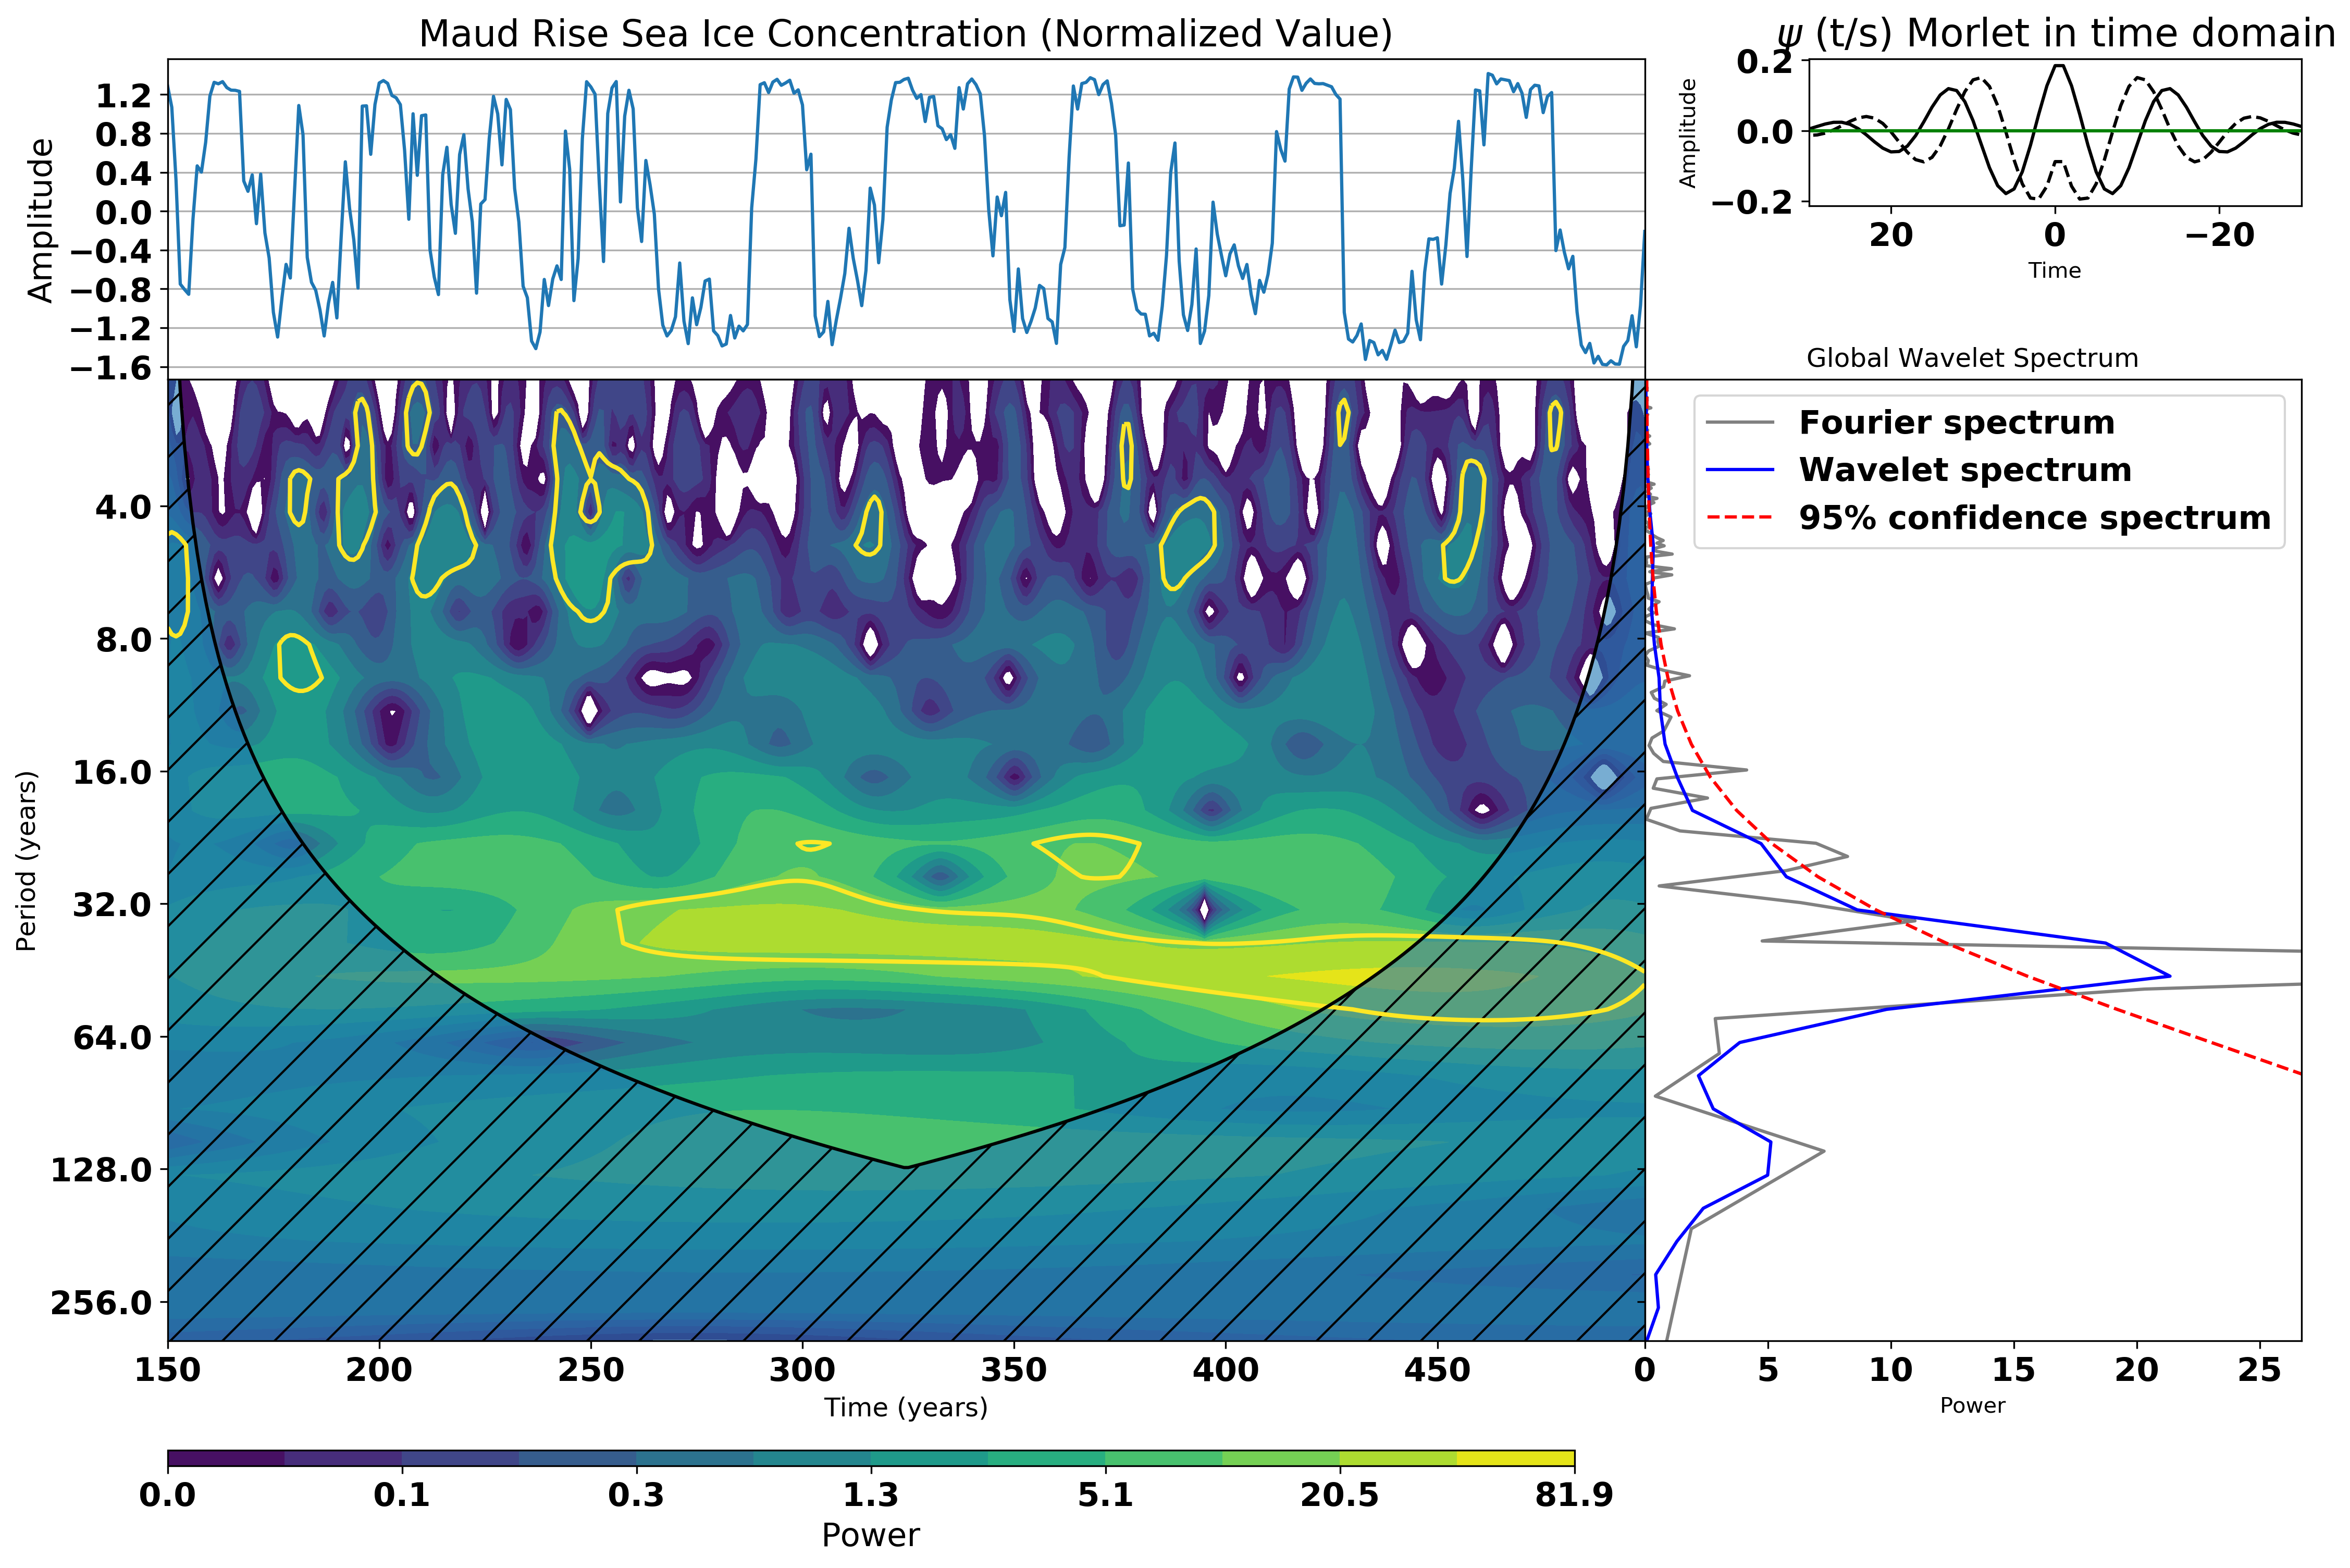

In [50]:
waipy.wavelet_plot(label, time, data_norm, 0.01, result, xlabel_cwt='Time (years)',ylabel_cwt='Period (years)');
font = {'family' : 'normal','weight' : 'bold','size'   : 15}
matplotlib.rc('font', **font)
plt.savefig("i1.png",bbox_inches='tight')

In [23]:
waipy

<module 'waipy' from '/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/waipy-0.0.1.51-py3.6.egg/waipy/__init__.py'>

In [51]:
weddlemean = np.loadtxt("weddlemeanice2new.out")

In [52]:
data_norm = waipy.normalize(weddlemean) # Normalized value, so now there is no unit

In [53]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.79


In [54]:
label='Weddell Sea Ice Concentration (Normalized Value)'

In [63]:
result = waipy.cwt(data_norm, 1, pad = 1, dj = 0.25, s0 = 2, j1 = 7/0.25, lag1 = alpha, param = 6, \
                   mother='Morlet',name='x')

Nr of Scales: 29
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966]


In [64]:
time = np.arange(0, 350) * 1 + 150

In [65]:
my_font = {'fontname':'Cambria', 'size':'25','weight' : 'bold'}

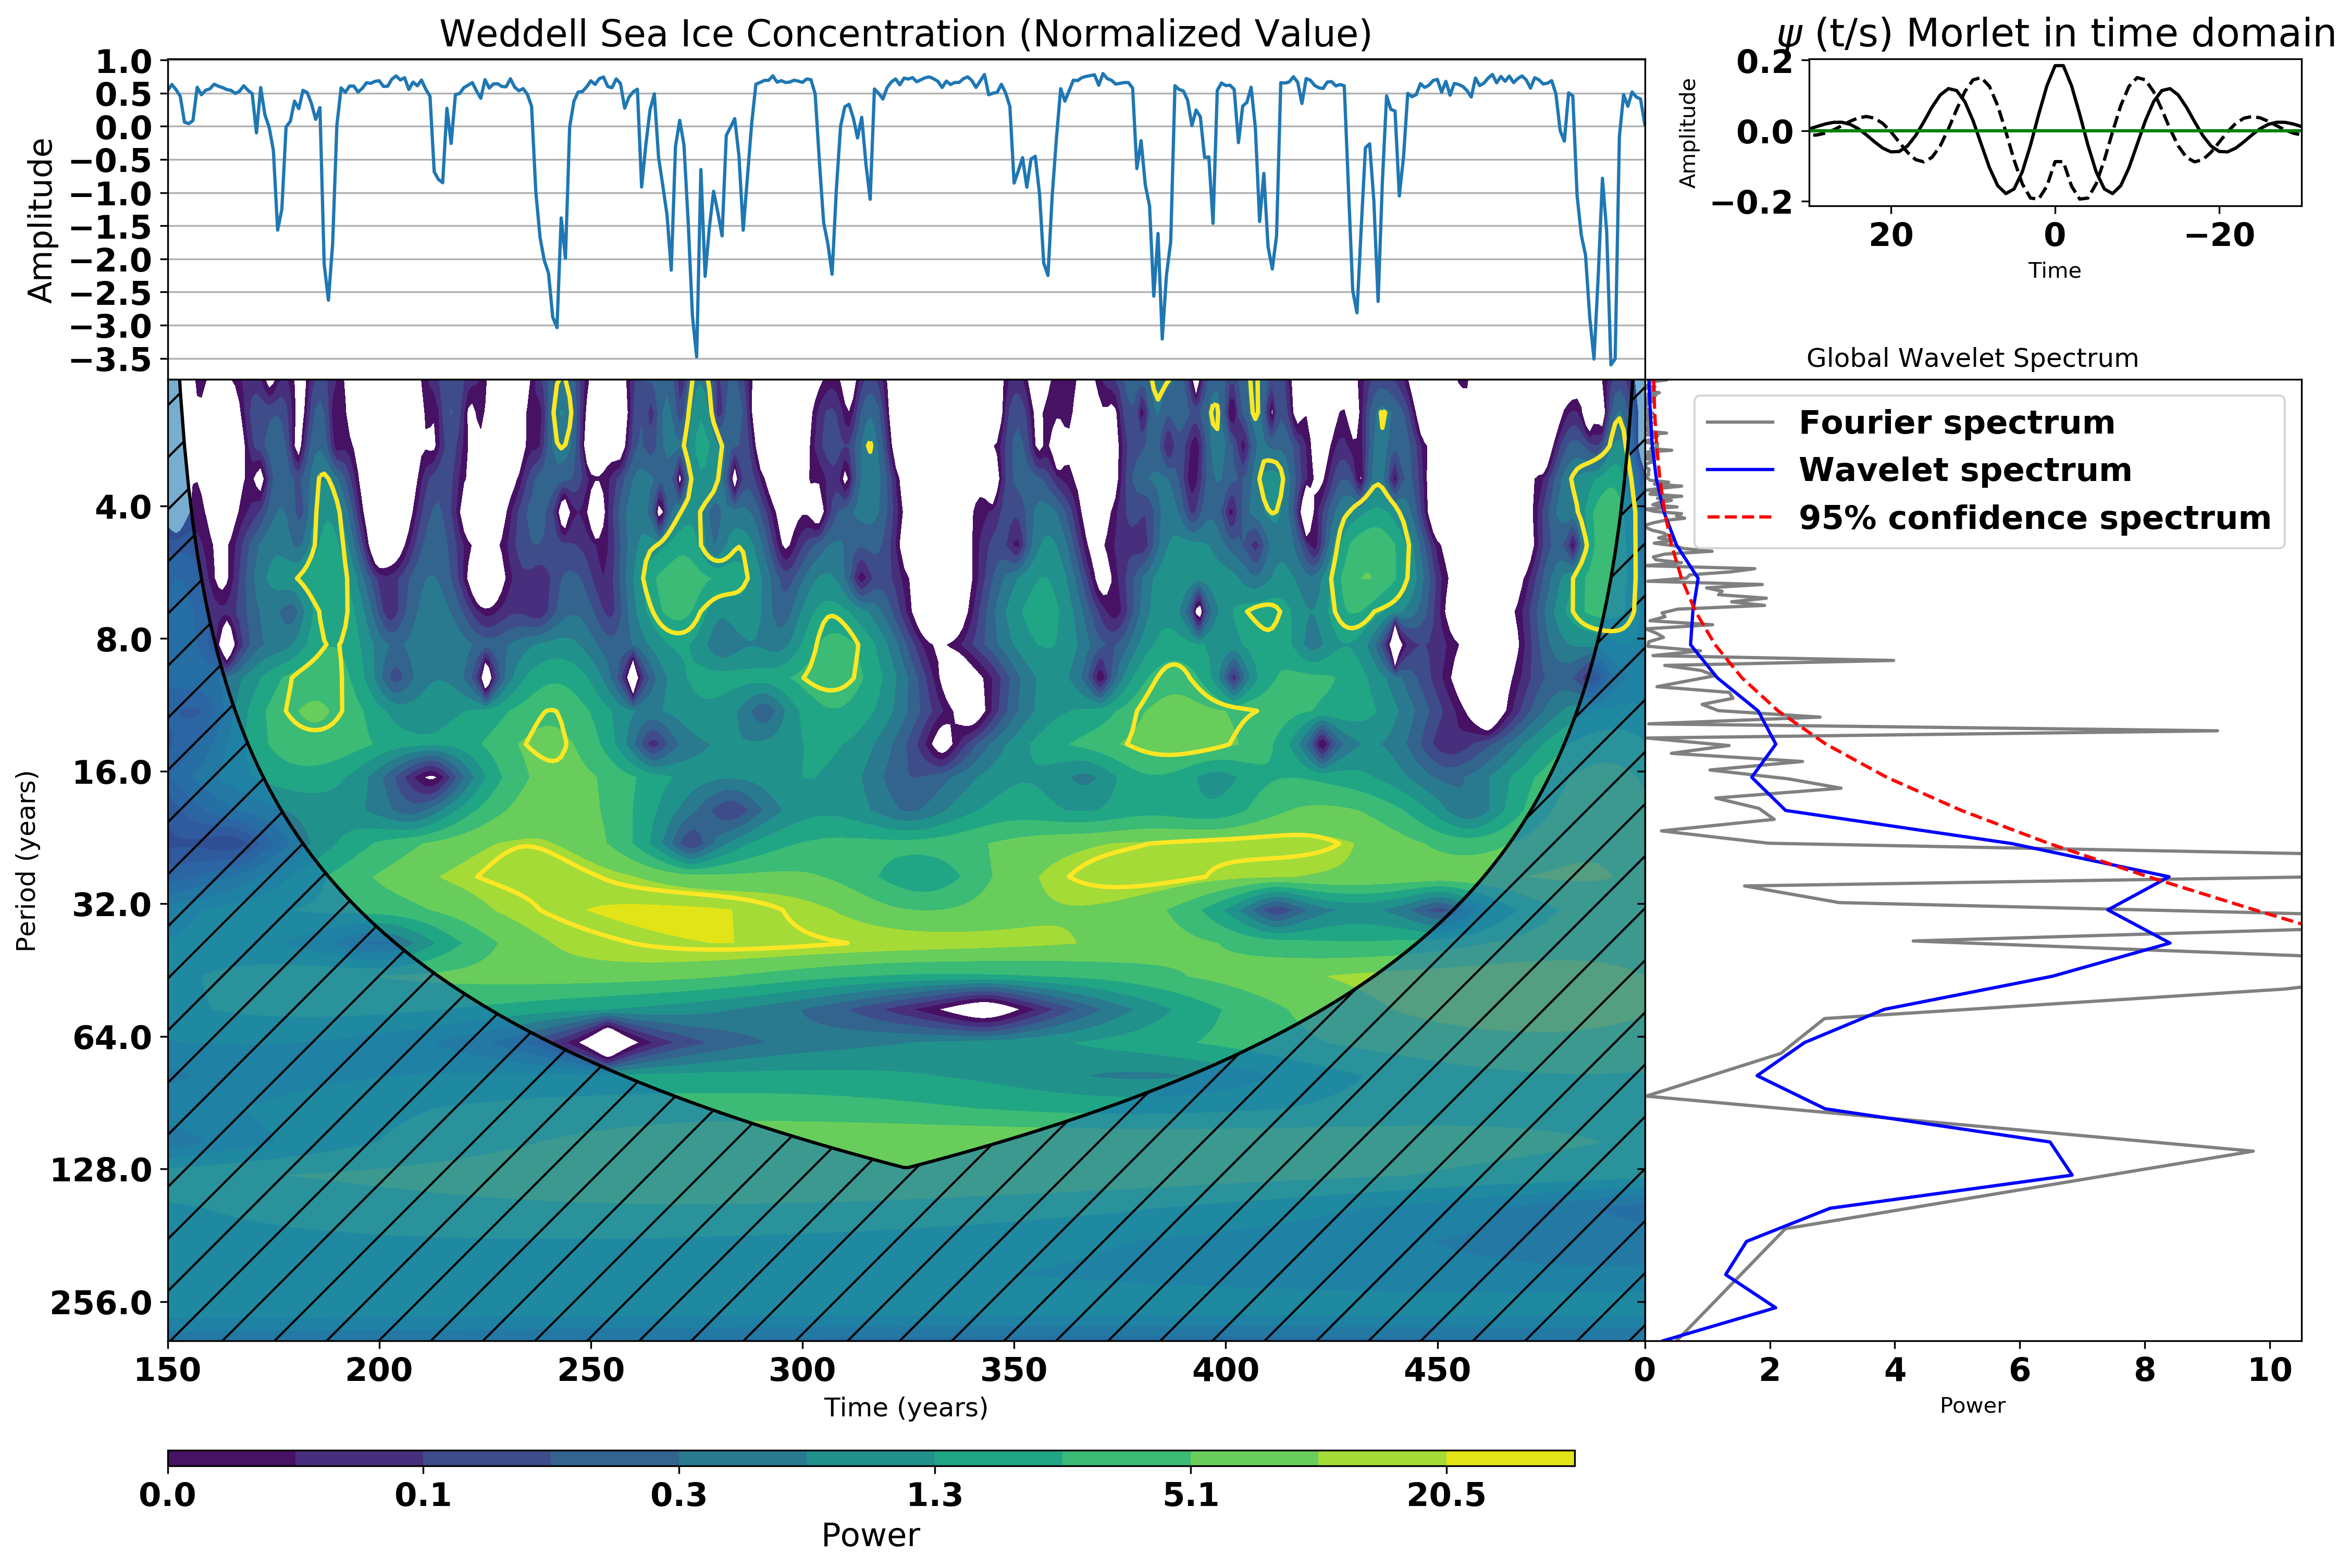

In [66]:
waipy.wavelet_plot(label, time, data_norm, 0.01, result, xlabel_cwt='Time (years)',ylabel_cwt='Period (years)');
font = {'family' : 'normal','weight' : 'bold','size'   : 15}
matplotlib.rc('font', **font)
plt.savefig("i2.png",bbox_inches='tight')